In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/Computer Vision/captures'

/content/gdrive/My Drive/Computer Vision/captures


In [ ]:
!cp "/content/drive/My Drive/face-mask-dataset/face_mask_dataset_mona_version.h5" model

In [ ]:
!cp "/content/drive/My Drive/face-mask-dataset/face_mask_dataset_2.h5" model

In [ ]:
!ls

In [ ]:
# install tensorflowjs 
!pip install tensorflowjs

     |████████████████████████████████| 71kB 2.6MB/s 
     |████████████████████████████████| 112kB 5.8MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

In [ ]:
# def keras2tfjs(model_path,dir_out):
MODEL_PATH = '/content/drive/My Drive/face-mask-dataset/face_mask_dataset_mona_version.h5'
FACEMODEL_PATH = '/content/drive/My Drive/face-mask-dataset/face_mask_dataset_2.h5' 
 #import tensorflowjs as tfjs
  #print('Model loading...')
model=load_model(MODEL_PATH)
  
 #print('Model loaded. Started serving...')


tfjs.converters.save_keras_model(model, dir_out)



NameError: ignored

In [ ]:
model_path='/content/drive/My Drive/face-mask-dataset'

dir_out='/content/keras2js'
keras2tfjs(model_path,dir_out)

In [ ]:
pip install mtcnn

In [ ]:
pip install python-resize-image

In [ ]:
# import the necessary packages
from datetime import datetime
from mtcnn import MTCNN
detector = MTCNN()
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img
import cv2
import os
from resizeimage import resizeimage

In [ ]:
model = load_model(MODEL_PATH)

In [ ]:
model = load_model('face_mask_dataset_2.h5')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt

def start_cam(quality=0.8):
  js = Javascript('''
    async function cam_starter(quality) {
      const div = document.createElement('div');
      div.setAttribute("id", "video_div");
      const capture = document.createElement('button');
      capture.setAttribute("id", "capture_id");
      capture.display="block"
      div.appendChild(capture);

      const video = document.createElement('video');
      video.setAttribute("id", "video_id");
      video.style.display = 'block';
      
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
    }
    ''')
  display(js)
  eval_js('cam_starter({})'.format(quality))

def terminate_cam():
  js = Javascript('''
    async function cam_terminator(quality) {
    video=document.getElementById("video_id");
    stream=video.srcObject;
    stream.getVideoTracks()[0].stop();
    div=document.getElementById("video_div");
    div.remove();
    }
    ''')
  display(js)
  data = eval_js('cam_terminator({})')


def take_photo1(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto1(quality) {
      //const div = document.createElement('div');
      //const capture = document.createElement('button');
      //capture.textContent = 'Capture';
      //div.appendChild(capture);

      //const video = document.createElement('video');
      //video.style.display = 'block';
      //const stream = await navigator.mediaDevices.getUserMedia({video: true});

      //document.body.appendChild(div);
      //div.appendChild(video);
      //video.srcObject = stream;
      //await video.play();
      // Resize the output to fit the video element.
      //print(video.videoHeight)
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      capture=document.getElementById("capture_id");
      video=document.getElementById("video_id");

      new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      //stream.getVideoTracks()[0].stop();
      //div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto1({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def start_Execution():
  js_start = Javascript('''
    async function create_start_button() {
      const div = document.createElement('div');
      const start_button = document.createElement('button');
      start_button.setAttribute("id", "strt_btn");
      
      start_button.onclick = async function () {
      document.getElementById("strt_btn").textContent = "Start";
      };

      start_button.textContent = 'Stop';
      div.appendChild(start_button);
      document.body.appendChild(div);

      return 0;
    }
    ''')
  display(js_start)
  working_status = eval_js('create_start_button({})')
  return(working_status)


In [ ]:
def get_status_Execution():
  js_update = Javascript('''
    async function status_button() {
      const stop_button = document.getElementById('strt_btn');
      status=document.getElementById("strt_btn").textContent;
      if(status=='Start')
      {
        return 1;
      }
      else
      {
        return 0;
      }    
    }
    ''')
  display(js_update)
  working_status = eval_js('status_button({})')
  return(working_status)

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 6.6MB/s 


In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
mtcnn_face_detector_model = MTCNN()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

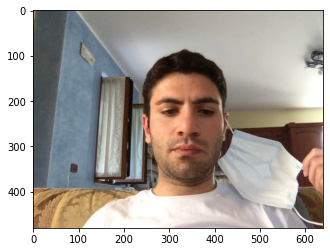

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt

try:
  working_status = start_Execution()
  start_cam()
  pic_index=0
  while(working_status==0):
    filename = take_photo1("pic_" + str(pic_index)+".jpg")
    working_status = get_status_Execution()
    img=plt.imread(filename)
    plt.imshow(img)
    pic_index = pic_index + 1
    # Show the image which was just taken.
    #display(Image(filename))
    #Putyour model here

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

terminate_cam()

In [ ]:
os.getcwd()

'/content/drive/My Drive/My_Pics'

In [ ]:
from imutils import paths

In [ ]:
!ls

In [ ]:
dataset = '/content/gdrive/My Drive/Computer Vision/captures/'

imagePaths = list(paths.list_images(dataset))

In [ ]:
imagePaths

['/content/gdrive/My Drive/Computer Vision/captures/pic_3.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_4.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_5.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_6.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_7.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_8.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_9.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_10.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_11.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_12.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_13.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_14.jpg',
 '/content/gdrive/My Drive/Computer Vision/captures/pic_15.jpg']

In [ ]:
dataset = '/content/gdrive/My Drive/Computer Vision/captures/'

imagePaths = list(paths.list_images(dataset)) # list all image paths

images = [] # images

for n in range(0, len(imagePaths)):

  # load image
  image = cv2.imread(imagePaths[n])
  images.append(image)

In [ ]:
threshold = 0.8

for n in range(0, len(images)):
  
  image = images[n]
  
  face_locations = mtcnn_face_detector_model.detect_faces(image)

  if face_locations is None:
    continue
  
  for face_location in face_locations:

    prob = face_location['confidence']

    if prob >= threshold:

      # box coordinates
      x1, y1, width, height = face_location['box']
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + width, y1 + height

      # detected faces
      face = image[y1:y2, x1:x2]

      # 4 points of bounding boxes
      a = [x1, y1]
      b = [x2, y1]
      c = [x2, y2]
      d = [x1, y2]
      
      # put bounding box
      x1 = a[0]
      y1 = a[1]
      cv2.rectangle(image, tuple(a), tuple(c), (0, 255, 0), 2)

      # mobilenetv2
      #face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
      face = cv2.resize(face, (224, 224))
      face = img_to_array(face)
      face = preprocess_input(face)
      face = np.expand_dims(face, axis=0)

      # pass the face through the model to determine if the face
      # has a mask or not
      (mask, withoutMask) = model.predict(face)[0]

      # determine the class label and color we'll use to draw
      # the bounding box and text
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

      # include the probability in the label
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

      # display the label and bounding box rectangle on the output
      # frame
      cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
      cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

      images[n] = image

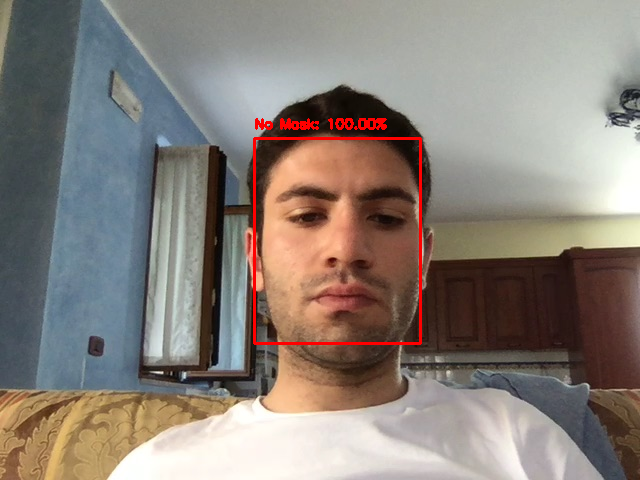

In [ ]:
cv2_imshow(images[0])

In [ ]:
import cv2
import os

image_folder = '.'
video_name = 'video.avi'

#images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
#frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = images[0].shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    #video.write(cv2.imread(os.path.join(image_folder, image)))
    video.write(image)

cv2.destroyAllWindows()
video.release()